In [340]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [341]:
url = 'https://min-api.cryptocompare.com/data/histominute' +\
        '?fsym=BTC' +\
        '&tsym=USD' +\
        '&limit=2000' +\
        '&aggregate=1'
response = requests.get(url)
data = response.json()['Data']

df = pd.DataFrame(data)
df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]

In [342]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1622113020,39290.15,39258.60,39260.38,6.798,266965.60,39277.87,direct,,2021-05-27 10:57:00
1,1622113080,39301.66,39250.02,39277.87,30.800,1209814.50,39250.02,direct,,2021-05-27 10:58:00
2,1622113140,39258.28,39194.41,39250.02,23.110,906483.32,39252.90,direct,,2021-05-27 10:59:00
3,1622113200,39375.14,39250.58,39252.90,39.810,1565848.93,39375.14,direct,,2021-05-27 11:00:00
4,1622113260,39439.96,39372.35,39375.14,24.150,951475.14,39431.01,direct,,2021-05-27 11:01:00
...,...,...,...,...,...,...,...,...,...,...
1996,1622232780,36094.11,36057.16,36057.16,42.630,1538112.44,36082.25,direct,,2021-05-28 20:13:00
1997,1622232840,36150.14,36082.25,36082.25,72.180,2606630.91,36136.96,direct,,2021-05-28 20:14:00
1998,1622232900,36141.32,36098.37,36136.96,40.870,1475956.28,36102.07,direct,,2021-05-28 20:15:00
1999,1622232960,36131.75,36102.07,36102.07,15.830,571918.01,36127.77,direct,,2021-05-28 20:16:00


In [343]:
df.describe()

,time,high,low,open,volumefrom,volumeto,close
count,2.001000e+03,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03,2001.000000
mean,1.622173e+09,37818.821014,37747.863603,37782.626357,65.820888,2.458940e+06,37781.053263
std,3.466700e+04,1375.769895,1386.340000,1381.357198,217.488182,8.041985e+06,1381.441887
min,1.622113e+09,35249.550000,35146.440000,35149.410000,0.000000,0.000000e+00,35149.410000
25%,1.622143e+09,36664.490000,36572.220000,36607.080000,20.760000,7.901163e+05,36605.710000
50%,1.622173e+09,38033.330000,37951.210000,37990.960000,33.990000,1.286795e+06,37988.470000
75%,1.622203e+09,38988.080000,38931.610000,38958.740000,58.190000,2.149869e+06,38956.260000
max,1.622233e+09,40408.950000,40317.180000,40365.290000,5892.300000,2.104329e+08,40365.290000


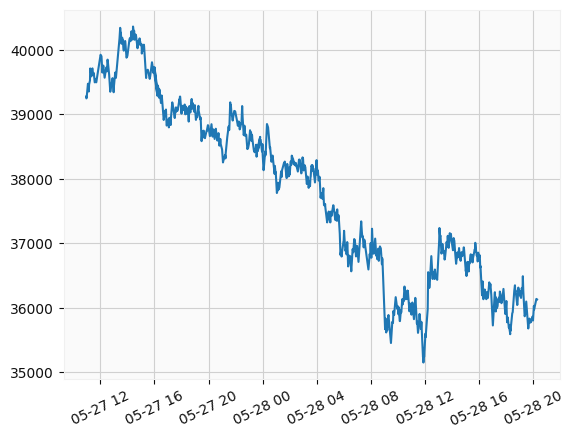

In [344]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=25)
plt.show()

### Indicators calc

#### Explore pandas_ta lib

In [345]:
import pandas_ta as ta

In [346]:
df3 = df.copy()
df3.ta.adjusted = 'Close'
df3.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.2.45b0
Total Indicators: 133
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, zlm

In [395]:
rsidf = df3.ta.rsi()
atrdf = df3.ta.atr(length=14)

#### Explore ta lib

In [447]:
from ta import add_all_ta_features
import numpy as np
import ta.volatility as vol
import ta.momentum as mom

indicator_atr = vol.AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=14)
atr2df = indicator_atr.average_true_range()
atr2df = atr2df.replace({'0':np.nan, 0:np.nan})

indicator_rsi = mom.RSIIndicator(close=df['close'], window=14)
rsi2df = indicator_rsi.rsi()
rsi2df = rsi2df.replace({'0':np.nan, 0:np.nan})

# dfta = add_all_ta_features(
#     df, open="open", high="high", low="low", close="close", volume="volumefrom")
# dfta.columns

### Plot candlesticks

In [443]:
import mplfinance as mpf

In [444]:
df2 = df.rename(columns={"timestamp": "Date", "open": "Open", "high": "High", "low": "Low", "close": "Close", "volumefrom": "Volume"})
df2 = df2[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df2.set_index('Date', inplace=True)

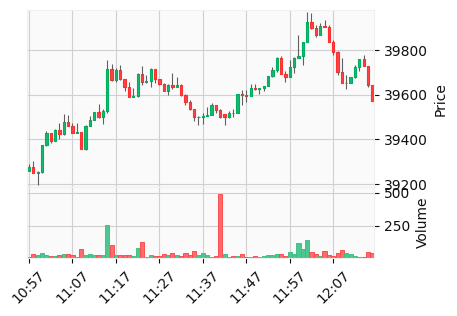

In [445]:
mpf.plot(df2[:80],
         type='candle',
         figscale=0.5,
         volume=True,
         style='yahoo',
         tight_layout=True)

### Plot lines and special marks

In [446]:
lines = [
            (str(df2.index[10]),df2['Close'][10]), 
            (str(df2.index[70]),df2['Close'][70])
        ]

In [450]:
def markersAt(df, dates):
    import numpy as np
    markers = []
    for date, value in df.T.iteritems():
        if date in dates:
            markers.append(value["High"]*1.001)
        else:
            markers.append(np.nan)
    return markers

dates1 = [df2.index[10], df2.index[30], df2.index[70]]
markers1 = markersAt(df2[:80], dates1)

dates2 = [df2.index[15], df2.index[20], df2.index[25]]
markers2 = markersAt(df2[:80], dates2)

other_plots = [
        mpf.make_addplot(df2[:80][['Close']], panel=0, linestyle='dashed', width=1),
        mpf.make_addplot(df2[:80][['Open']], panel=1, linestyle='solid', width=1, secondary_y=True),
        mpf.make_addplot(markers1,type='scatter',markersize=200,marker='v'),
        mpf.make_addplot(markers2,type='scatter',markersize=100,marker='$\u2665$'),
        mpf.make_addplot(rsidf[:80], panel=2, linestyle='dotted', width=1, ylabel='RSI1', color=('r')),
        mpf.make_addplot(rsi2df[:80], panel=3, linestyle='dotted', width=1, ylabel='RSI2', color=('r')),
        mpf.make_addplot(atrdf[:80], panel=4, linestyle='dotted', width=1, ylabel='ATR1', color=('b')),
        mpf.make_addplot(atr2df[:80], panel=5, linestyle='dotted', width=1, ylabel='ATR2', color=('b'))
       ]

vlines=[str(df2.index[24]),
     str(df2.index[42])]

tdates = [(df2.index[30],df2.index[60])]

In [ ]:
#valid_types = ('line','scatter','bar', 'ohlc', 'candle')

mpf.plot(df2[:80],
         type='candle',
         figscale=0.8,
         volume=True,
         style='yahoo',
         addplot=other_plots,
         alines=lines,
         vlines=dict(vlines=vlines,colors=('c','r'),linewidths=0.1),
#          tlines=[
#             dict(tlines=tdates,tline_use=['Low'],tline_method='least-squares',colors='b'),
#             dict(tlines=tdates,tline_use=['Low'],tline_method='point-to-point',colors='g')
#          ],
         tight_layout=True,
         panel_ratios=(10,5,2,2,2,2)
        )
#          mav=(20,50,200))

In [ ]:
mpf.plot(df2[:300],figscale=0.5,type='renko',volume=True,style='yahoo', tight_layout=True)

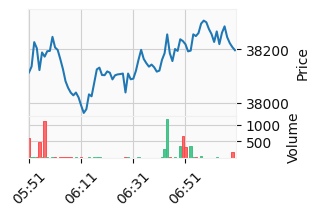

In [180]:
mpf.plot(df2[:80],figscale=0.3,type='line',volume=True,style='yahoo', tight_layout=True)